In [2]:
import pickle
from caiman.base.rois import register_multisession
from caiman.utils import visualization
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import bokeh.plotting as bpl
import cv2
import glob
import logging
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
import numpy as np
import os
import pickle
from custom_functions import loadmat

try:
    cv2.setNumThreads(0)
except():
    pass

try:
    if __IPYTHON__:
        # this is used for debugging purposes only. allows to reload classes
        # when changed
        get_ipython().magic('load_ext autoreload')
        get_ipython().magic('autoreload 2')
except NameError:
    pass

import caiman as cm
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import cnmf as cnmf
from caiman.source_extraction.cnmf import params as params
from caiman.utils.utils import download_demo
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
bpl.output_notebook()

import matplotlib as mpl
mpl.rcParams.update({
    'figure.figsize': (18, 13),
})

Loading BokehJS ...

# data to list
all cells' flattened spatial footprints of the same FOV over 6 days  
template (correlation image) for each day  
- A is a list where each entry is the matrix of the spatial components for each session  
- CI is a list where each entry is the correlation image for each session

In [3]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
if 'dview' in locals():
    cm.stop_server(dview=dview)
c, dview, n_processes = cm.cluster.setup_cluster(
    backend='local', n_processes=None, single_thread=False)

In [5]:
filename = 'i1339_210922_002_multipage_100k_local.hdf5'
cnm = cnmf.load_CNMF(filename, n_processes=n_processes, dview=dview)

In [6]:
mmap_name = 'Z:/All_Staff/home/lan/Data/2P_images/tif/i1339_210922_002/i1339_210922_002_multipage_100k_local_els__d1_264_d2_796_d3_1_order_F_frames_100000_.mmap'
Yr, dims, T = cm.load_memmap(mmap_name)
images = np.reshape(Yr.T, [T] + list(dims), order='F') 

Cn = cm.local_correlations(images.transpose(1,2,0))
Cn[np.isnan(Cn)] = 0

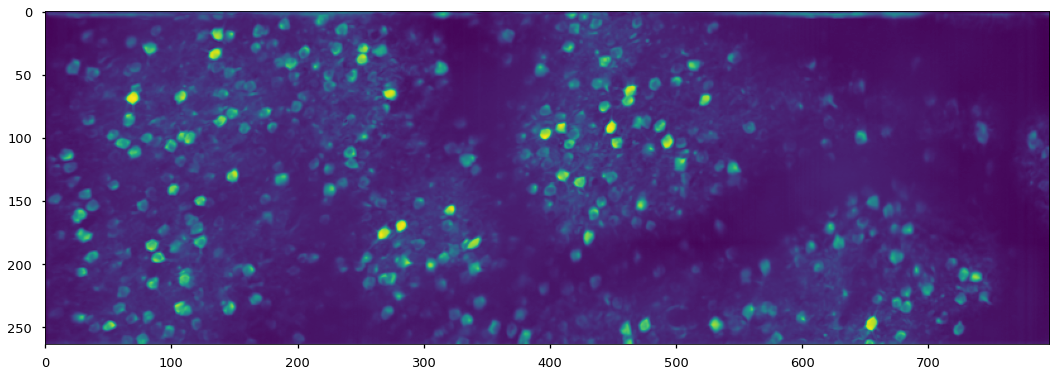

In [8]:
plt.imshow(Cn)

In [12]:
cnm.mmap_file

'C:\\Users\\ll357\\Documents\\CaImAn\\demos\\temp_data\\i1339_210922_002\\memmap__d1_264_d2_796_d3_1_order_C_frames_100000_.mmap'

In [11]:
dir(cnm)

['HALS4footprints',
 'HALS4traces',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'compute_residuals',
 'deconvolve',
 'dims',
 'dview',
 'empty_merged',
 'estimates',
 'fit',
 'fit_file',
 'initialize',
 'merge_comps',
 'mmap_file',
 'params',
 'preprocess',
 'refit',
 'remove_components',
 'remove_very_bad_comps',
 'save',
 'skip_refinement',
 'update_spatial',
 'update_temporal']